In [1]:
from os import listdir
from os.path import isfile,join
import argparse
import numpy as np
import sys
import os
import shutil
import random
import math

In [2]:
width_in_cfg_file=416
height_in_cfg_file=416

In [3]:
import xml.etree.ElementTree as ET
from os import getcwd
import os

In [4]:
save_folder='E:/SHI/YOLO_V3/model_data/'
dataset_train = 'C:/Users/abi78/OneDrive/Desktop/Aeroplane/'
dataset_file = save_folder+'data.txt'
classes_file = dataset_file[:-4]+'_classes.txt'

In [4]:
CLS = os.listdir(dataset_train)
classes =[dataset_train+CLASS for CLASS in CLS]
wd = getcwd()

NameError: name 'dataset_train' is not defined

In [5]:
images=listdir('E:/SHI/YOLO_V3/model_data/images/')
path='E:/SHI/YOLO_V3/model_data/images/'
len(images)

2017

In [6]:
import xml.etree.ElementTree as ET


In [7]:
img_path='E:/SHI/YOLO_V3/model_data/images/'
xml_path='E:/SHI/YOLO_V3/model_data/xml/'

In [8]:
img_name=listdir(img_path)

xml_name=listdir(xml_path)

In [9]:
img_data=[]
xml_data=[]
for img in img_name:
    name=img_path+img
    img_data.append(name)
    
for xml in xml_name:
    tree=ET.parse(xml_path+xml)
    root=tree.getroot()
    bbox=''
    for obj in root.iter('object'):
        
        for obj2 in obj.iter('bndbox'):
            
            for obj3 in obj2.iter('xmin'):
                a=''
                a=' '+obj3.text
                bbox+=a+','
                a=''
            for obj3 in obj2.iter('ymin'):
                b=''
                b=obj3.text+','
                bbox+=b
                b=''
            for obj3 in obj2.iter('xmax'):
                c=''
                c=obj3.text
                c=c+','
                bbox+=c
                c=''
            for obj3 in obj2.iter('ymax'):
                c=''
                d=obj3.text  
                d=d+','
                bbox+=d
                d=''
        for cls in obj.iter('name'):
            cls_name=''
            cls_name=cls.text
            if(cls_name=='aeroplane'):
                cls_name='0'
            if(cls_name=='birds'):
                cls_name='1'
            if(cls_name=='brids'):
                cls_name='1'    
            if(cls_name=='drone'):
                cls_name='2'
            if(cls_name=='helicopter'):
                cls_name='3'
            if(cls_name=='jet'):
                cls_name='4'   
            bbox+=cls_name
            cls_name=''
    xml_data.append(bbox)
        


            
    



In [10]:
len(xml_data)

2017

In [14]:
img_data.clear()
xml_data.clear()
res.clear()
ee.clear()

NameError: name 'res' is not defined

In [14]:
len(ee)

2017

In [11]:
res=[]
for (i,j) in zip(img_data,xml_data):
    
    oo=i+j
    res.append(oo)
len(res)    

2017

In [15]:
ee=res[2016]
ee

'E:/SHI/YOLO_V3/model_data/images/jet_99.jpg 7,114,403,281,4'

In [13]:
ee=[]
for name in res:
    name+="\n" 
    ee.append(name)
len(ee)    

2017

In [16]:
for name in ee:
    file1=open('E:/SHI/YOLO_V3/model_data/image.txt','a')
    
    file1.writelines(name)
    
    

In [22]:
len(ee)

2017

In [15]:
len(ee)

2017

In [24]:
import numpy as np
import argparse
import json

ans=[]
class YOLO_Kmeans:
    def __init__(self, cluster_number, annot_file, out_file):
        self.cluster_number = cluster_number
        self.annot_file = annot_file
        self.out_file = out_file

    def iou(self, boxes, clusters):  # 1 box -> k clusters
        n = boxes.shape[0]
        k = self.cluster_number

        box_area = boxes[:, 0] * boxes[:, 1]
        box_area = box_area.repeat(k)
        box_area = np.reshape(box_area, (n, k))

        cluster_area = clusters[:, 0] * clusters[:, 1]
        cluster_area = np.tile(cluster_area, [1, n])
        cluster_area = np.reshape(cluster_area, (n, k))

        box_w_matrix = np.reshape(boxes[:, 0].repeat(k), (n, k))
        cluster_w_matrix = np.reshape(np.tile(clusters[:, 0], (1, n)), (n, k))
        min_w_matrix = np.minimum(cluster_w_matrix, box_w_matrix)

        box_h_matrix = np.reshape(boxes[:, 1].repeat(k), (n, k))
        cluster_h_matrix = np.reshape(np.tile(clusters[:, 1], (1, n)), (n, k))
        min_h_matrix = np.minimum(cluster_h_matrix, box_h_matrix)
        inter_area = np.multiply(min_w_matrix, min_h_matrix)

        result = inter_area / (box_area + cluster_area - inter_area)
        return result

    def avg_iou(self, boxes, clusters):
        accuracy = np.mean([np.max(self.iou(boxes, clusters), axis=1)])
        return accuracy

    def kmeans(self, boxes, k, dist=np.median):
        box_number = boxes.shape[0]
        distances = np.empty((box_number, k))
        last_nearest = np.zeros((box_number,))
        np.random.seed()
        clusters = boxes[np.random.choice(
            box_number, k, replace=False)]  # init k clusters
        while True:

            distances = 1 - self.iou(boxes, clusters)

            current_nearest = np.argmin(distances, axis=1)
            if (last_nearest == current_nearest).all():
                break  # clusters won't change
            for cluster in range(k):
                clusters[cluster] = dist(  # update clusters
                    boxes[current_nearest == cluster], axis=0)

            last_nearest = current_nearest

        return clusters

    def result2txt(self, data):
        f = open(self.out_file, 'w')
        row = np.shape(data)[0]
        for i in range(row):
            if i == 0:
                x_y = "%d,%d" % (data[i][0], data[i][1])
            else:
                x_y = ", %d,%d" % (data[i][0], data[i][1])
            f.write(x_y)
        f.close()

    def txt2boxes(self):
        
        f = open(self.annot_file, 'r')
        dataSet = []
        for line in f:
            infos = line.split(" ")
            length = len(infos)
            
            for i in range(1, length):
                width = int(infos[i].split(",")[2]) -  int(infos[i].split(",")[0])
                height = int(infos[i].split(",")[3]) -  int(infos[i].split(",")[1])
                dataSet.append([width, height])
        result = np.array(dataSet)
        f.close()
        return result

    def txt2clusters(self):
        all_boxes = self.txt2boxes()
        result = self.kmeans(all_boxes, k=self.cluster_number)
        result = result[np.lexsort(result.T[0, None])]
        ans=result
        self.result2txt(result)
        result_print = json.dumps(result.tolist())
        print("K anchors:\n {}".format(result_print))
        print("Accuracy: {:.2f}%".format(
            self.avg_iou(all_boxes, result) * 100))




In [37]:
cluster_number = 9
annot_file = "E:/SHI/YOLO_V3/model_data/image.txt"
out_file = "E:/SHI/YOLO_V3/yolo_anchors.txt"
kmeans = YOLO_Kmeans(cluster_number, annot_file, out_file)
kmeans.txt2clusters()
print(ans)

K anchors:
 [[41, 33], [101, 68], [125, 237], [174, 156], [235, 291], [238, 85], [345, 327], [356, 125], [367, 196]]
Accuracy: 74.82%
[]


In [58]:
array=kmeans.txt2boxes()


In [71]:
for name in array:
    file1=open('E:/SHI/YOLO_V3/array.txt','a')
    
    file1.writelines(str(name)+" ")
    
    
    

In [2]:
pip install import_ipynb

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-py3-none-any.whl size=2975 sha256=7026ce951a98fab4bb2bf896c4189e3469ad343174f4d9f8ab53db6e4718300f
  Stored in directory: c:\users\abi78\appdata\local\pip\cache\wheels\14\d1\f8\04883e42b40c1d3d24cb6579b16c63d4735bb1c8b82c5d29e3
Successfully built import-ipynb
Note: you may need to restart the kernel to use updated packages.


In [14]:
from ipynb.fs.full.<model.ipynb> import <compose>

SyntaxError: invalid syntax (Temp/ipykernel_20572/1594135649.py, line 1)

In [22]:

f = open(annot_file, 'r')
dataSet = []
infos=[]
for line in f:
    
    infos = line.split(" ")
    length = len(infos)
    print(infos)
         
    for i in range(1, len(infos)):
        width = int(infos[i].split(",")[2]) - \
            int(infos[i].split(",")[0])
        height = int(infos[i].split(",")[3]) - \
            int(infos[i].split(",")[1])
        dataSet.append([width, height])
result = np.array(dataSet) 
dataSet.clear()
print(dataSet)
f.close()



['E:/SHI/YOLO_V3/model_data/images/aeroplane_1.jpg', '87,167,391,264,0\n']
['E:/SHI/YOLO_V3/model_data/images/aeroplane_10.jpg', '63,147,389,285,0\n']
['E:/SHI/YOLO_V3/model_data/images/aeroplane_100.jpg', '23,68,405,312,0\n']
['E:/SHI/YOLO_V3/model_data/images/aeroplane_101.jpg', '18,118,402,294,0\n']
['E:/SHI/YOLO_V3/model_data/images/aeroplane_102.jpg', '36,171,163,269,0\n']
['E:/SHI/YOLO_V3/model_data/images/aeroplane_103.jpg', '18,196,295,281,0\n']
['E:/SHI/YOLO_V3/model_data/images/aeroplane_104.jpg', '13,109,414,258,0\n']
['E:/SHI/YOLO_V3/model_data/images/aeroplane_105.jpg', '47,156,374,264,0\n']
['E:/SHI/YOLO_V3/model_data/images/aeroplane_106.jpg', '143,151,416,345,0\n']
['E:/SHI/YOLO_V3/model_data/images/aeroplane_107.jpg', '28,130,414,286,0\n']
['E:/SHI/YOLO_V3/model_data/images/aeroplane_108.jpg', '4,84,416,325,0\n']
['E:/SHI/YOLO_V3/model_data/images/aeroplane_109.jpg', '4,152,395,271,0\n']
['E:/SHI/YOLO_V3/model_data/images/aeroplane_11.jpg', '51,180,364,286,0\n']
['E:/S

In [107]:
distances = np.zeros((20,))
distances.shape
np.random.seed()

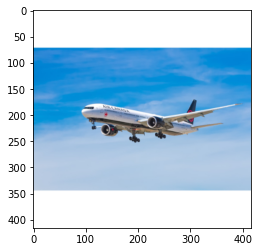

In [68]:
import matplotlib.pyplot as plt 
import numpy as np 
from PIL import Image
img = Image.open("E:/SHI/YOLO_V3/model_data/images/aeroplane_1.jpg")

plt. imshow(img)


In [126]:
f=open("E:/SHI/YOLO_V3/model_data/image.txt","r")


In [123]:
eo=[]
for name in f:
   eo.append(name) 

In [124]:
len(eo)

2028

In [129]:
data={}
for name in f:
    
    infos=name.split(" ")
    length=len(infos)
    for i in range(1,length):
        string=""
        width = int(infos[i].split(",")[2]) -  int(infos[i].split(",")[0])
        height = int(infos[i].split(",")[3]) -  int(infos[i].split(",")[1])
        string = str(width)+" "+str(height)+" "
        if str(infos[0]) in data:
            data[infos[0]]=data[infos[0]]+str(string)
        else:
            data[infos[0]]=string   

In [127]:
data.clear()

In [131]:
len(data)

2028

In [130]:
data

{'E:/SHI/YOLO_V3/model_data/images/aeroplane_1.jpg': '304 97 ',
 'E:/SHI/YOLO_V3/model_data/images/aeroplane_10.jpg': '326 138 ',
 'E:/SHI/YOLO_V3/model_data/images/aeroplane_100.jpg': '382 244 ',
 'E:/SHI/YOLO_V3/model_data/images/aeroplane_101.jpg': '384 176 ',
 'E:/SHI/YOLO_V3/model_data/images/aeroplane_102.jpg': '127 98 ',
 'E:/SHI/YOLO_V3/model_data/images/aeroplane_103.jpg': '277 85 ',
 'E:/SHI/YOLO_V3/model_data/images/aeroplane_104.jpg': '401 149 ',
 'E:/SHI/YOLO_V3/model_data/images/aeroplane_105.jpg': '327 108 ',
 'E:/SHI/YOLO_V3/model_data/images/aeroplane_106.jpg': '273 194 ',
 'E:/SHI/YOLO_V3/model_data/images/aeroplane_107.jpg': '386 156 ',
 'E:/SHI/YOLO_V3/model_data/images/aeroplane_108.jpg': '412 241 ',
 'E:/SHI/YOLO_V3/model_data/images/aeroplane_109.jpg': '391 119 ',
 'E:/SHI/YOLO_V3/model_data/images/aeroplane_11.jpg': '313 106 ',
 'E:/SHI/YOLO_V3/model_data/images/aeroplane_110.jpg': '319 125 ',
 'E:/SHI/YOLO_V3/model_data/images/aeroplane_111.jpg': '182 61 ',
 'E

In [132]:
f = open("E:/SHI/YOLO_V3/delete_file.txt", "w")
f.write("{\n")
for k in data.keys():
    f.write("'{}':'{}'\n".format(k, data[k]))
f.write("}")
f.close()

In [217]:

def kmeans(boxes, k=9, dist=np.median):
    box_number = boxes.shape[0]
    distances = np.empty((box_number, k))
    last_nearest = np.zeros((box_number,))
    np.random.seed()
    clusters = boxes[np.random.choice(box_number, k, replace=False)]
    print(clusters)
    

In [213]:
def txt2boxes():
    f = open("E:/SHI/YOLO_V3/model_data/image.txt", 'r')
    dataSet = []
    for line in f:
        infos = line.split(" ")
        length = len(infos)
            
        for i in range(1, length):
            width = int(infos[i].split(",")[2]) -  int(infos[i].split(",")[0])
            height = int(infos[i].split(",")[3]) -  int(infos[i].split(",")[1])
            dataSet.append([width, height])
    result = np.array(dataSet)
    f.close()
    return result

In [218]:
boxes=txt2boxes()
print(boxes.shape[0])
result=kmeans(boxes,9,dist=np.median)
result

2426
[[271  74]
 [114 100]
 [165 308]
 [369 354]
 [295 229]
 [139 105]
 [326 396]
 [370 179]
 [340 322]]


In [220]:
``````np.random.choice(100,10)

array([78, 94,  9, 27, 49, 81, 34, 68, 86, 88])

In [38]:
def get_classes(classes_path):
    '''loads the classes'''
    with open(classes_path) as f:
        class_names = f.readlines()
    class_names = [c.strip() for c in class_names]
    return class_names

In [43]:
name=get_classes('E:/SHI/YOLO_V3/model_data/classes.txt')
name

['aeroplane', 'birds', 'drone', 'helicopter', 'jet']

### a=0.005*np.random.normal(size=5)
print(a)
b=np.array([[1,2,3,4,5],[1,2,3,4,5],[1,2,3,4,5],[1,2,3,4,5],[1,2,3,4,5],[1,2,3,4,5]])
b=b+a
b.shape

In [24]:
image=open("E:/SHI/YOLO_V3/model_data/image.txt")
data=[]
for img in image:
    data.append(img)
data[0]   

'E:/SHI/YOLO_V3/model_data/images/aeroplane_1.jpg 87,167,391,264,0\n'

In [25]:
new_data = []

for string in data:
    new_string = string.replace("E:/SHI/YOLO_V3/model_data/images/", "../input/images/images/")

    new_data.append(new_string)
new_data    

['../input/images/images/aeroplane_1.jpg 87,167,391,264,0\n',
 '../input/images/images/aeroplane_10.jpg 63,147,389,285,0\n',
 '../input/images/images/aeroplane_100.jpg 23,68,405,312,0\n',
 '../input/images/images/aeroplane_101.jpg 18,118,402,294,0\n',
 '../input/images/images/aeroplane_102.jpg 36,171,163,269,0\n',
 '../input/images/images/aeroplane_103.jpg 18,196,295,281,0\n',
 '../input/images/images/aeroplane_104.jpg 13,109,414,258,0\n',
 '../input/images/images/aeroplane_105.jpg 47,156,374,264,0\n',
 '../input/images/images/aeroplane_106.jpg 143,151,416,345,0\n',
 '../input/images/images/aeroplane_107.jpg 28,130,414,286,0\n',
 '../input/images/images/aeroplane_108.jpg 4,84,416,325,0\n',
 '../input/images/images/aeroplane_109.jpg 4,152,395,271,0\n',
 '../input/images/images/aeroplane_11.jpg 51,180,364,286,0\n',
 '../input/images/images/aeroplane_110.jpg 68,187,387,312,0\n',
 '../input/images/images/aeroplane_111.jpg 106,130,288,191,0\n',
 '../input/images/images/aeroplane_112.jpg 39,

In [28]:
for name in ee:
    file1=open('E:/SHI/YOLO_V3/model_data/image.txt','a')
    
    file1.writelines(name)
  

In [2]:
NET_TYPE='YOLO_V5'
[320, 352, 384, 416, 448, 480, 512, 544, 576, 608] if not 'mobilenetv3' in NET_TYPE else [416]

[320, 352, 384, 416, 448, 480, 512, 544, 576, 608]